In [1]:
 import json
import matplotlib.pyplot as plt
import os
# Opening JSON file
#f = open('ViLT_Impulse-noise_L5.json')
  
# returns JSON object as 
# a dictionary
#data = json.load(f)


In [2]:
directory='D:\Predefence\experiment\\ff\Reports'

In [3]:
def correct(data):
    num=0
    total=len(data['data'])
    for i in data['data']:
        if( i['correct']==True ):
            num+=1
            
    return (num/total)*100
    

In [53]:
def show_barplot(noise,values):
    #f, ax = plt.subplots(figsize=(18,10))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(noise,values)
    plt.xticks(rotation=90)
    plt.show()
    return 
    

In [5]:
def show_scatterplot(levels,values,name):
    f, ax = plt.subplots(figsize=(18,10))
    plt.scatter(levels, values, c ="blue")
    plt.plot(levels, values)
    plt.title(name)
    plt.show()
    
    

## Analysis of all the noises but separately

In [20]:
#This is for level vs noise graph for every sort of noise. 
def levelvval(name):
    n=[]
    v=[]
    num=1
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:5+len(name)]=='ViLT_'+name:
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                v.append(correct(data))
                n.append('L'+num.__str__())
                num+=1
    v.sort(reverse=True) #Had to sort because of the anomaly in the weights 
    show_scatterplot(n,v,name)
    #return n,v
    
    
    

In [21]:


all_noise=["Grayscale", "Grayscale-Inverse","Shot-noise","Gaussian-noise","Impulse-noise","Speckle-noise","Defocus-blur","Zoom-Blur","Snow","Brightness","Contrast","Saturation", "Elastic","Pixelate","JPEG-compression","Spatter"]

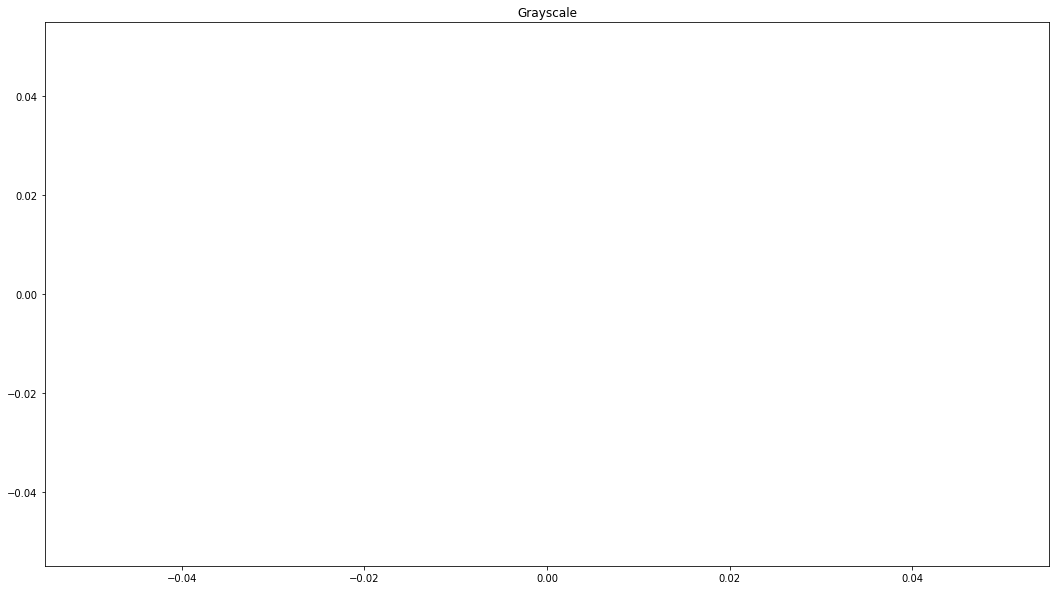

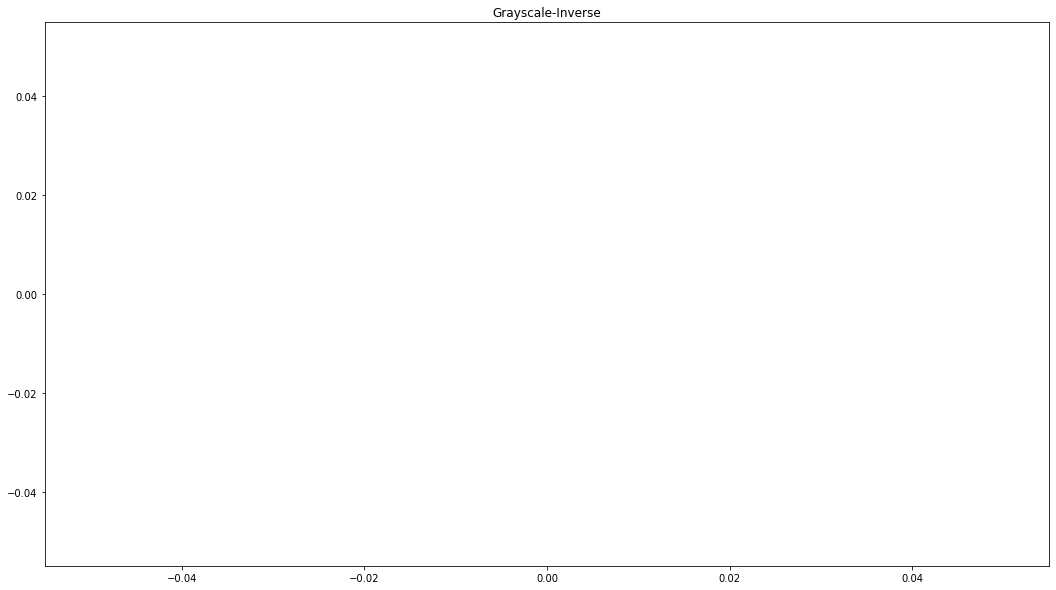

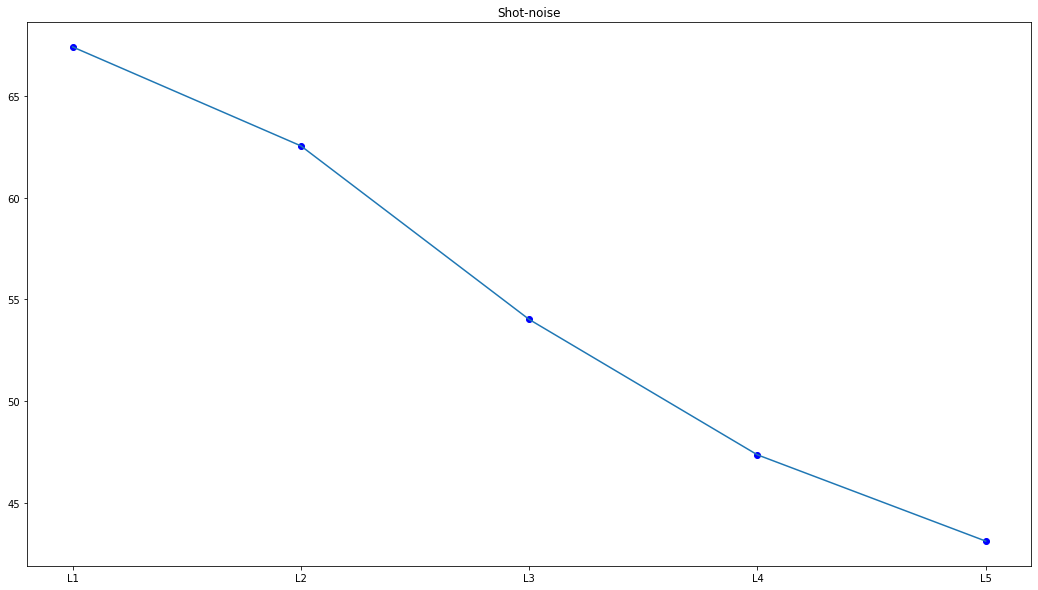

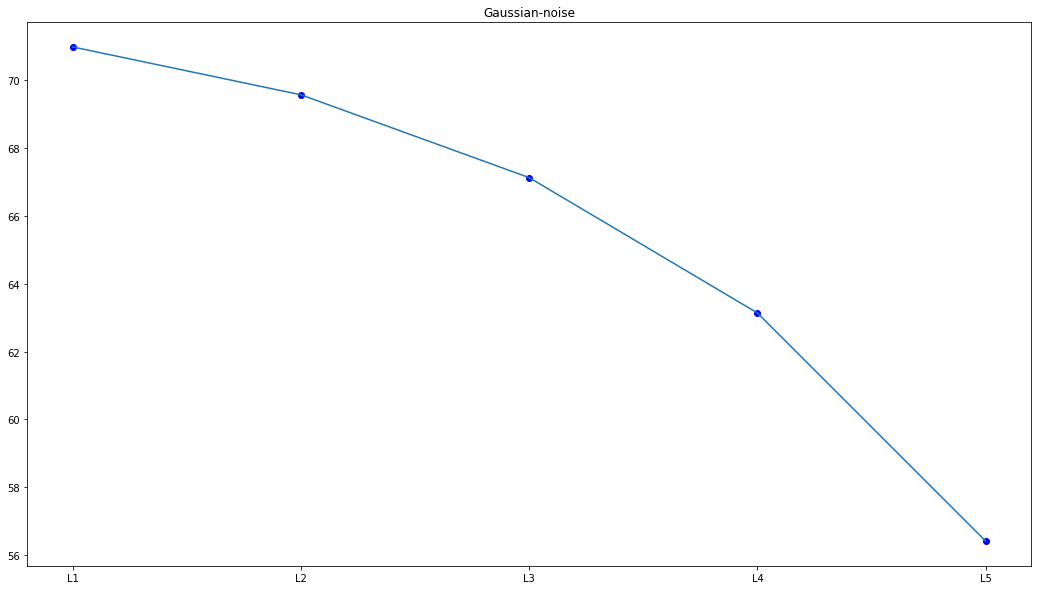

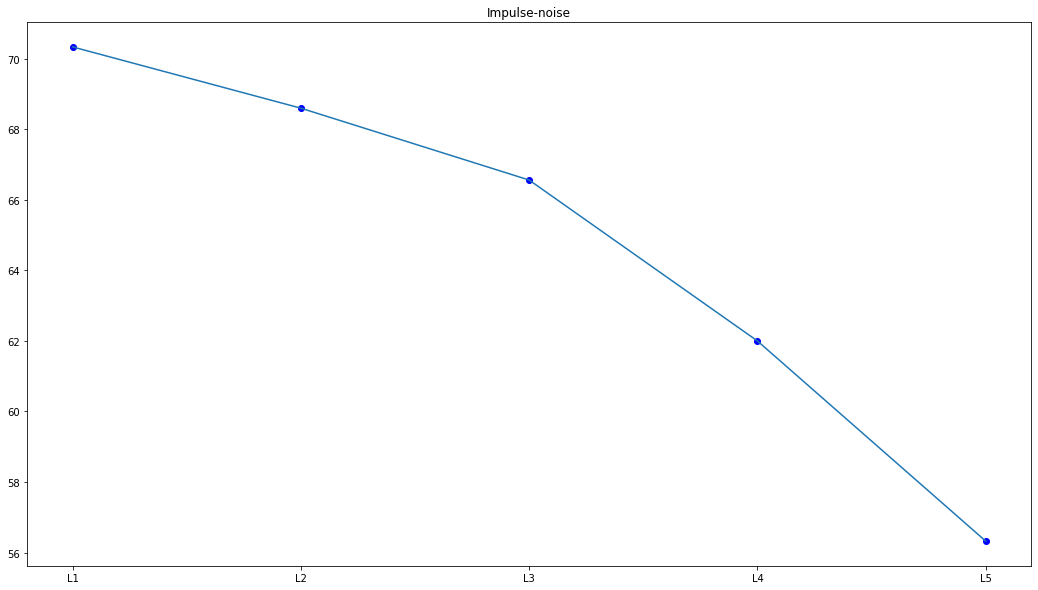

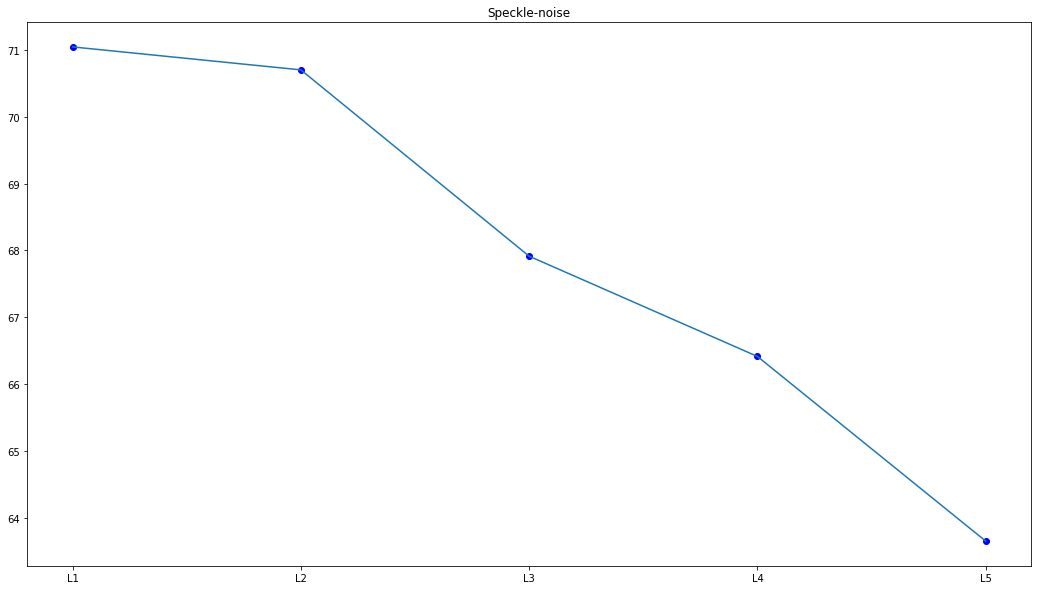

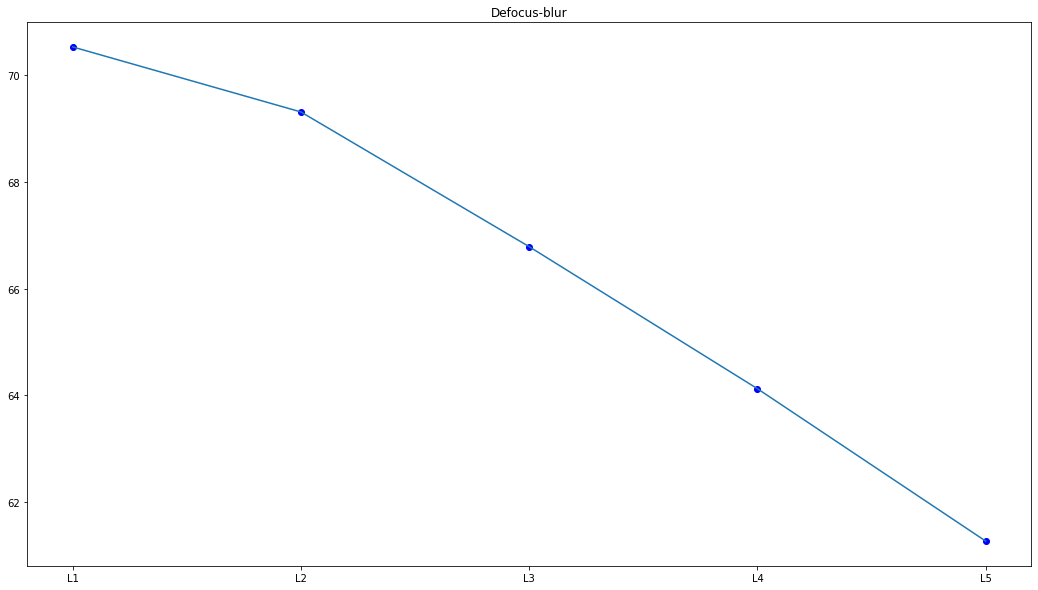

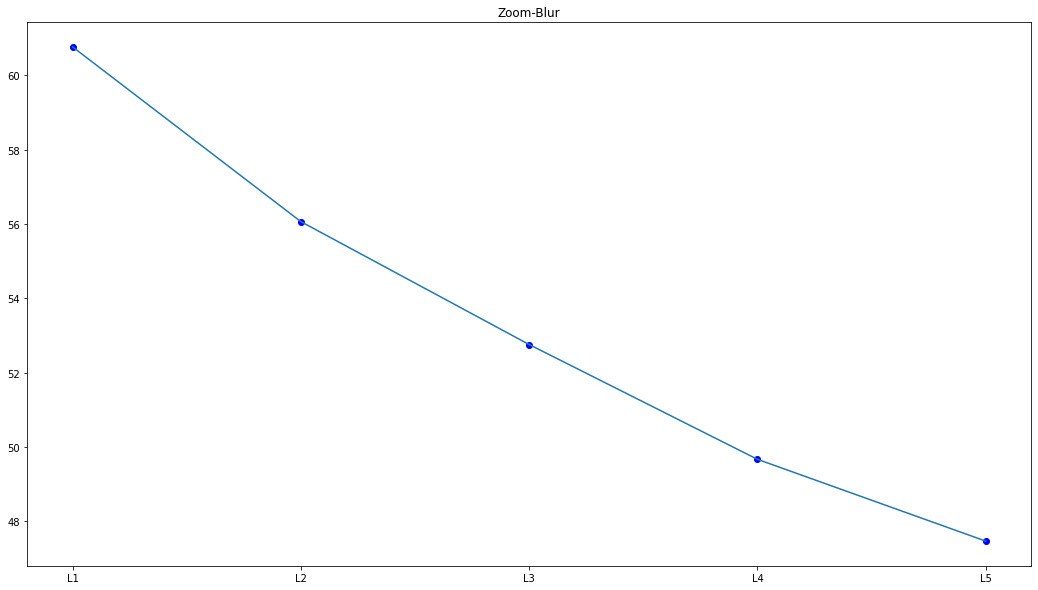

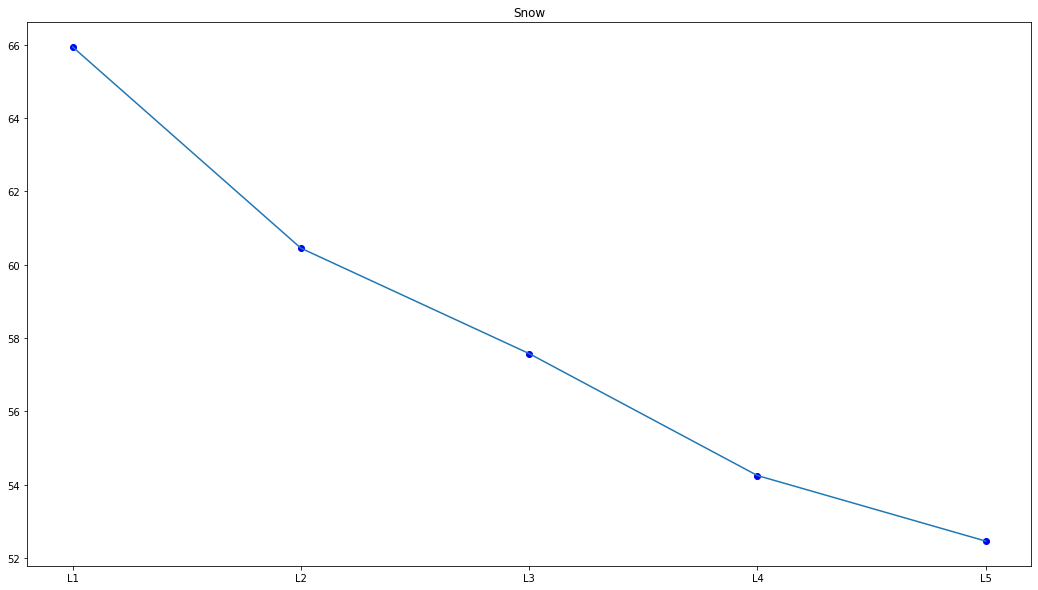

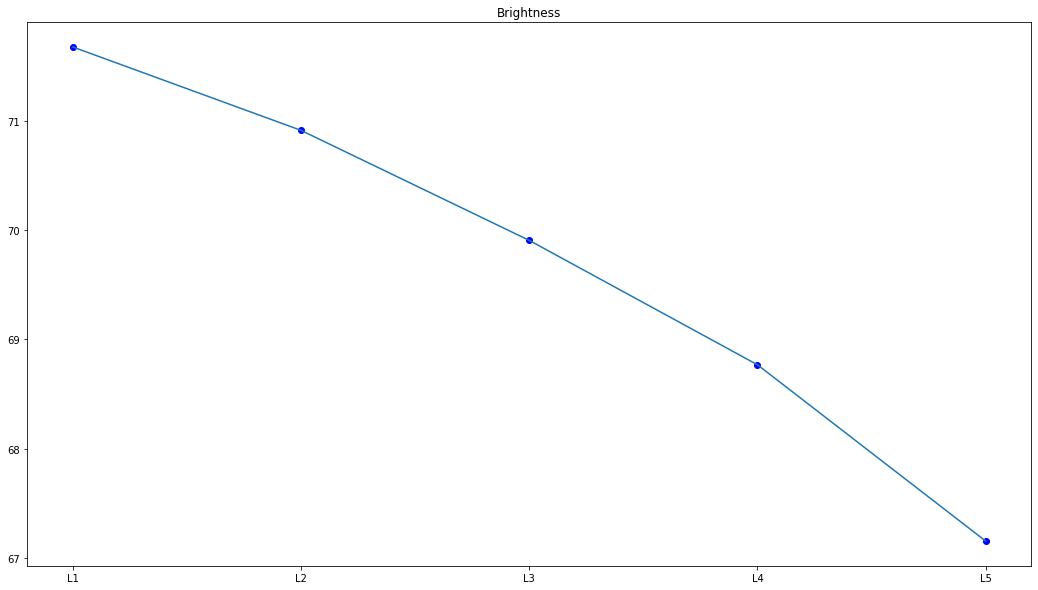

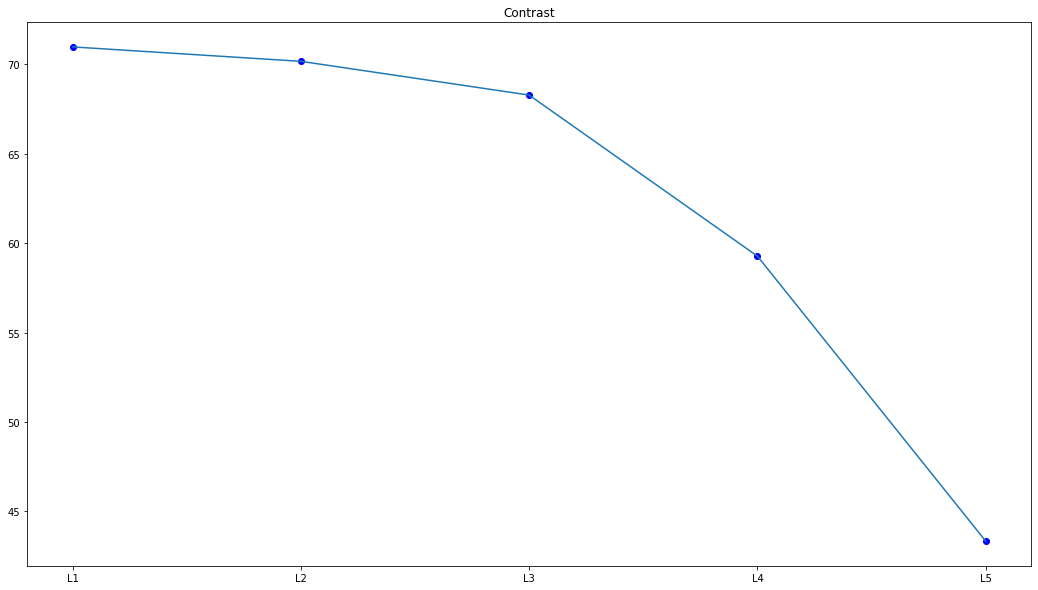

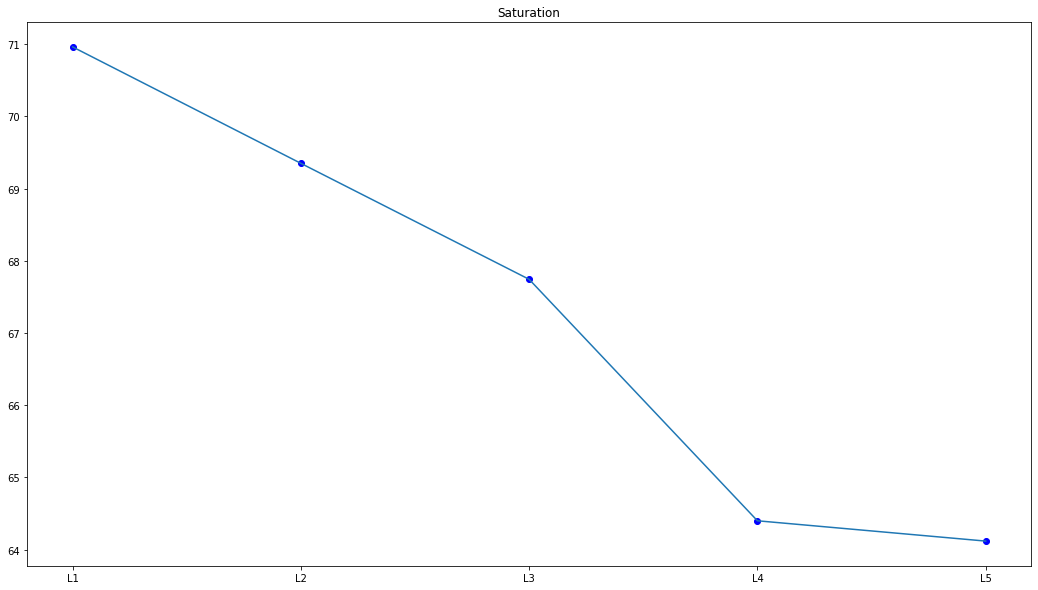

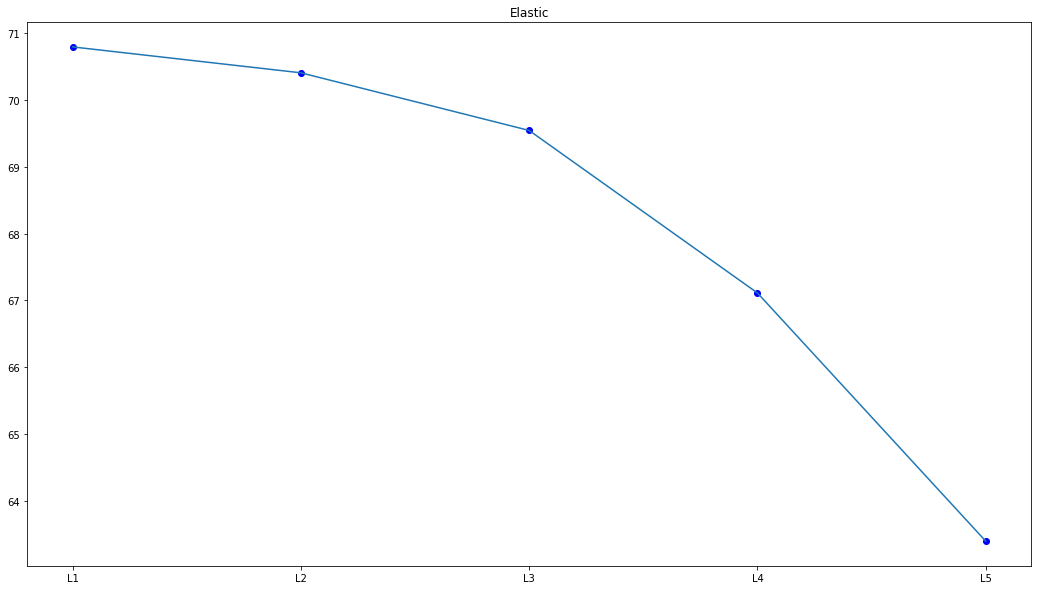

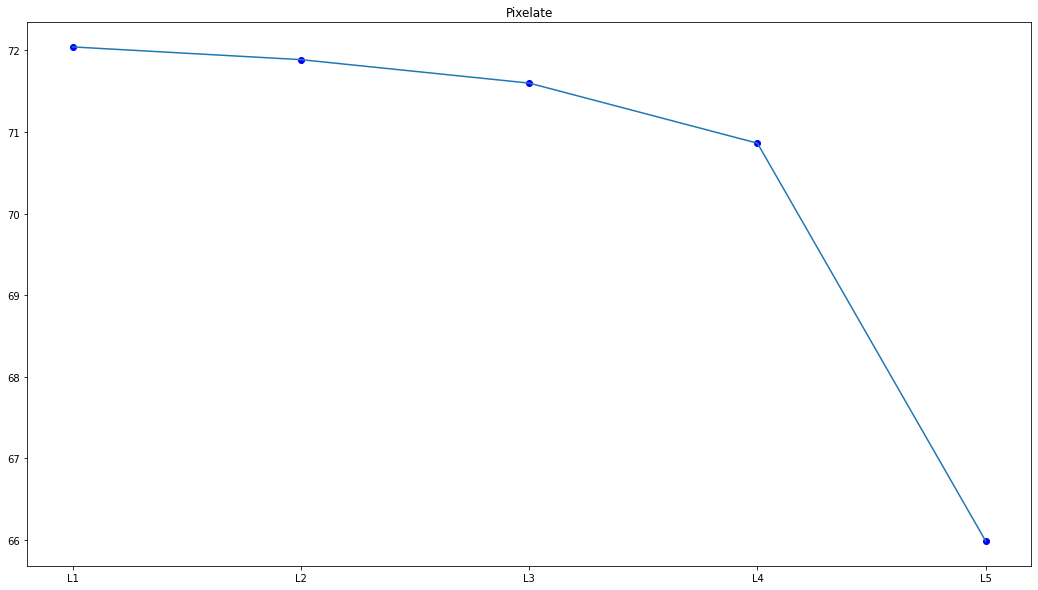

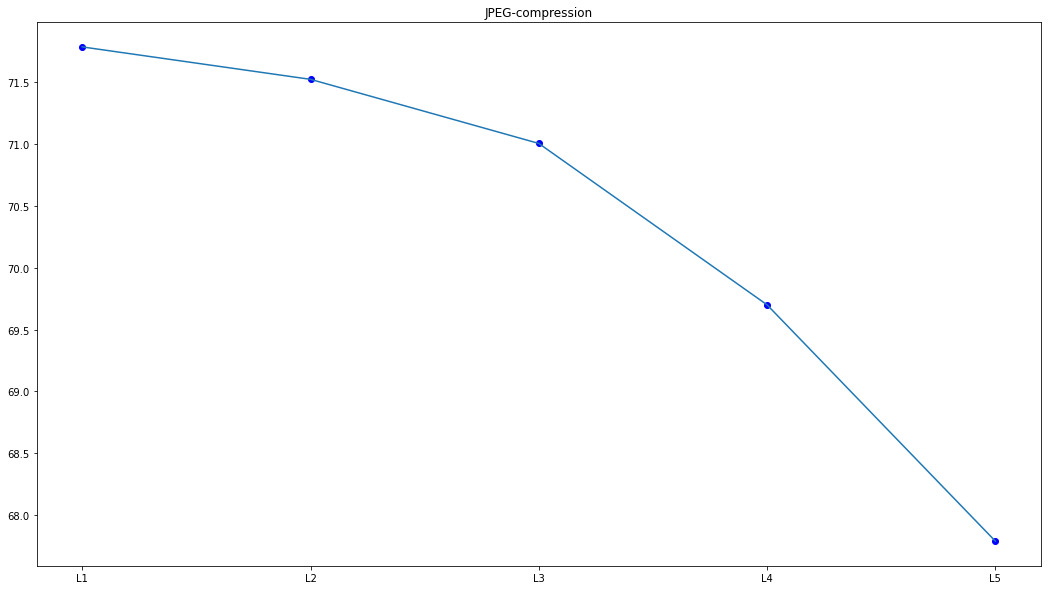

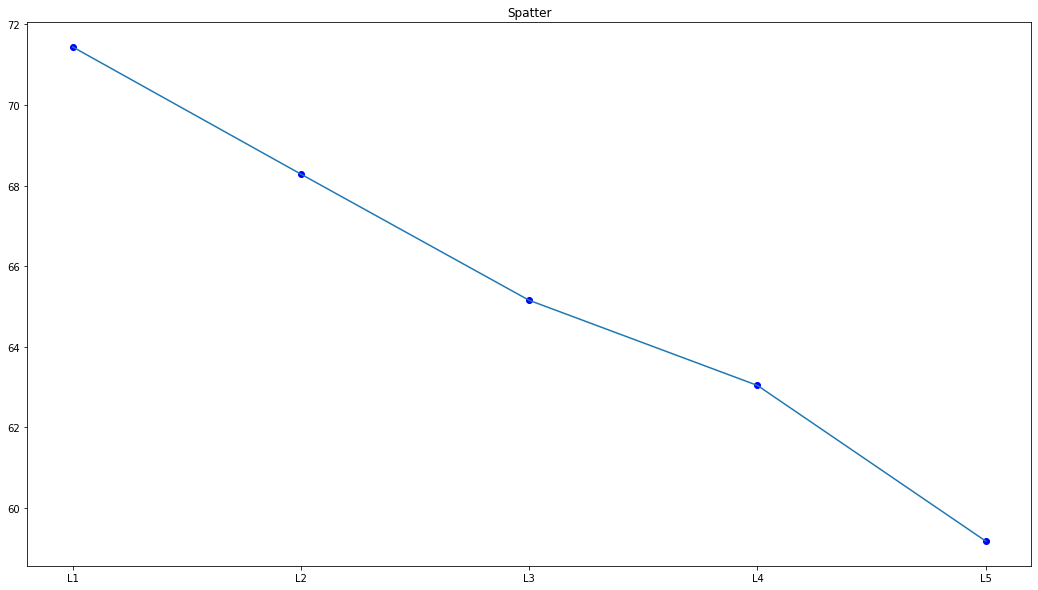

In [22]:
all_n=[]
all_v=[]
for i in all_noise:
    name=i
    levelvval(name)
    #tt_n,tt_v=levelvval(name)
    #all_n.append(tt_n)
    #all_v.append(tt_v)
    

## Analysis of all the noises together

In [31]:


all_noise=["Grayscale", "Grayscale-Inverse","Shot-noise","Gaussian-noise","Impulse-noise","Speckle-noise","Defocus-blur","Zoom-Blur","Snow","Brightness","Contrast","Saturation", "Elastic","Pixelate","JPEG-compression","Spatter"]

In [32]:
def levelvval2(name):
    n=[]
    v=[]
    num=1
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:5+len(name)]=='ViLT_'+name:
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                v.append(correct(data))
                n.append('L'+num.__str__())
                num+=1
    v.sort(reverse=True) #Had to sort because of the anomaly in the weights
    #show_scatterplot(n,v,name)
    return n,v

In [33]:
all_n=[]
all_v=[]
for i in all_noise:
    name=i
    #levelvval(name)
    tt_n,tt_v=levelvval2(name)
    all_n.append(tt_n)
    all_v.append(tt_v)
    

Text(0.5, 1.0, 'Noise vs Level Graph')

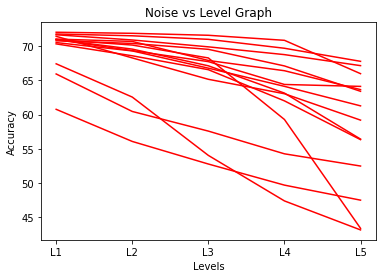

In [34]:
for i in range(0,len(all_n)):
    plt.plot(all_n[i], all_v[i], color='r', label='sin')
    
plt.xlabel("Levels")
plt.ylabel("Accuracy")
plt.title("Noise vs Level Graph")

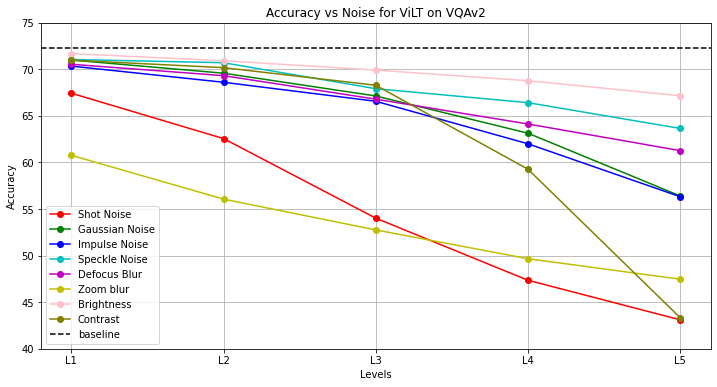

In [35]:
f, ax = plt.subplots(figsize=(12,6))
plt.plot(all_n[2], all_v[2], color='r',label='Shot Noise',marker='o')
plt.plot(all_n[3], all_v[3], color='g',label='Gaussian Noise',marker='o')
plt.plot(all_n[4], all_v[4], color='b',label='Impulse Noise',marker='o')
plt.plot(all_n[5], all_v[5], color='c',label='Speckle Noise',marker='o')
plt.plot(all_n[6], all_v[6], color='m',label='Defocus Blur',marker='o')
plt.plot(all_n[7], all_v[7], color='y',label='Zoom blur',marker='o')
plt.plot(all_n[9], all_v[9], color='pink',label='Brightness',marker='o')
plt.plot(all_n[10], all_v[10], color='olive',label='Contrast',marker='o')
plt.axhline(y = 72.3, color = 'k', linestyle = '--',label='baseline')
plt.legend(loc="lower left")
plt.xlabel("Levels")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Noise for ViLT on VQAv2")
plt.ylim(40, 75)
plt.grid()

## Analysis of the average accuracy from all the noises.

In [28]:
def compare( name ):
    total=0
    num=1
    for filename2 in os.listdir(directory):
        f = os.path.join(directory, filename2)
        for filename in os.listdir(f):
            if filename[0:5+len(name)]=='ViLT_'+name:
                #print('yes')
                f=open(directory + '\\' + name + '_L'+num.__str__()+ '\\' +filename)
                data = json.load(f)
                total+=(correct(data))
                num+=1
    if(num==1):
        return 0,0
    return name, total/(num-1)

In [29]:
all_noise=["Grayscale", "Grayscale-Inverse","Shot-noise","Gaussian-noise","Impulse-noise","Speckle-noise","Defocus-blur","Glass-blur","Zoom-Blur","Snow","Brightness","Contrast","Saturation", "Elastic","Pixelate","JPEG-compression","Spatter"]

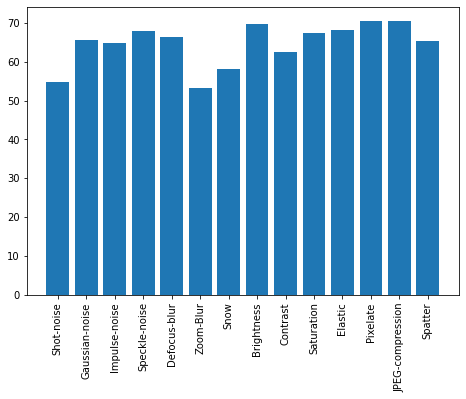

In [54]:
noise=[]
vals=[]
for i in all_noise:
    temp_noise, temp_val=compare(i)
    if(temp_val==0):
        continue
    noise.append(temp_noise)
    vals.append(temp_val)
    
show_barplot(noise, vals)

In [40]:
vals

[54.89375,
 65.4475,
 64.765,
 67.94375,
 66.405,
 53.34375,
 58.135000000000005,
 69.68375,
 62.40875,
 67.31499999999998,
 68.25125,
 70.475,
 70.36125,
 65.42249999999999]